<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/1_DiscreteTimeSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Discrete Time Signals

In [295]:
import numpy as np
import matplotlib.pyplot as plt


*1[Slicing and Striding](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding)

## Excercise With Python

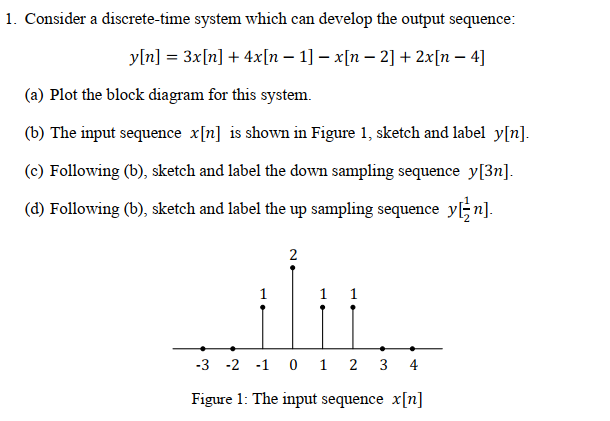

Signal Input and Output

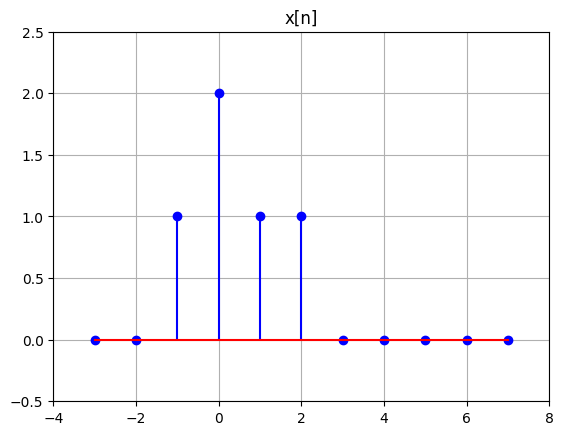

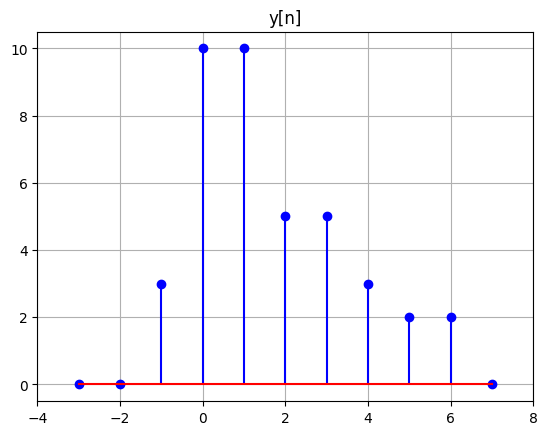

In [296]:
# Problem 1
n = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([0, 0, 3, 10, 10, 5, 5, 3, 2, 2, 0])
x = np.array([0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0])

# Plot x[n]
plt.figure()
plt.stem(n, x, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 2.5])
plt.xlim([-4, 8])
plt.title("x[n]")
plt.grid(True)
plt.show()

# Plot y[n]
plt.figure()
plt.stem(n, y, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
plt.xlim([-4, 8])
plt.title("y[n]")
plt.grid(True)
plt.show()


## Downsampling Output

In [297]:
# def downsample(signal,factor):
#   # Make sure there's integer factor
#   if factor <= 0 or not isinstance(factor, int):
#     raise ValueError("Factor must be a positive integer.")
#   # Place the original signal values at the correct indices with Slicing and striding
#   return signal[::factor]
def downsample(signal, indices, factor):
    if factor <= 0 or not isinstance(factor, int):
        raise ValueError("Factor must be a positive integer.")

    # Increase The Index by Factor
    min_index = int(indices[0] / factor)
    max_index = int(indices[-1] / factor)
    upsampled_indices = np.arange(min_index, max_index - 1, 1)

    # Create Zeros Matrix
    upsampled_signal = np.zeros_like(upsampled_indices, dtype=signal.dtype)

    # Map original signal values to their new positions
    ## get old Indices multiply by factor, and shift to new indeces
    original_positions = (upsampled_indices / factor).astype(int)
    upsampled_signal[original_positions] = signal

    return upsampled_signal, indices

array([ 0,  0,  3, 10, 10,  5,  5,  3,  2,  2,  0])

array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [314]:
def downsample(signal,indices,factor):
  # factor = 3
  # print("index :",end="")
  # print(indices)
  # print("signal:",end="")
  # print(signal)
  # print("factor:",end="")

  # print(factor)

  loc_zero = np.where(indices == 0)[0][0]
  ## index
  i_r_arm = indices[(loc_zero):]
  new_i_r_arm = i_r_arm[::factor]
  new_i_r_arm = (new_i_r_arm[1:]/factor).astype(int)

  i_l_arm = np.flip(indices[0:loc_zero+1])
  new_i_l_arm = i_l_arm[::factor]
  new_i_l_arm = (new_i_l_arm[1:]/factor).astype(int)

  print("Right:",end="")
  print(new_i_r_arm)
  print("Left :",end="")
  print(new_i_l_arm)
  new_i = np.concatenate((np.flip(new_i_l_arm),np.array([indices[loc_zero]]) ,new_i_r_arm))

  # print("Signal Side")
  ## Signal
  r_arm = signal[(loc_zero):]
  new_r_arm = r_arm[::factor]
  new_r_arm = new_r_arm[1:]
  # print(new_r_arm)

  l_arm = np.flip(signal[0:loc_zero+1])
  new_l_arm = l_arm[::factor]
  new_l_arm = new_l_arm[1:]
  # print(np.flip(new_l_arm))

  new_arr = np.concatenate((np.flip(new_l_arm),np.array([signal[loc_zero]]) ,new_r_arm))
  # print(new_arr)
  # print(new_i)
  return new_arr,new_i

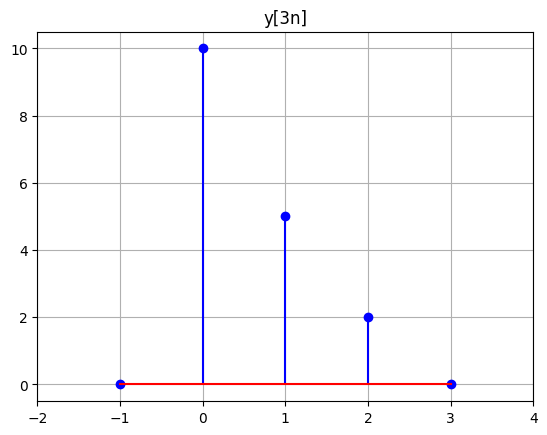

Right:[1 2]
Left :[-1]


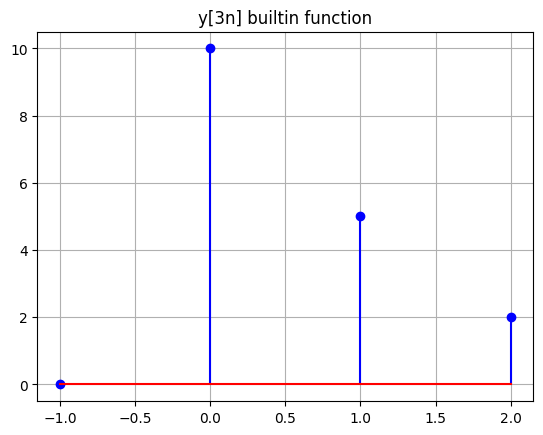

In [315]:

# Plot y[3n]
n2 = np.array([-1, 0, 1, 2, 3])
y2 = np.array([0, 10, 5, 2, 0])
plt.figure()
plt.stem(n2, y2, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
plt.xlim([-2, 4])
plt.title("y[3n]")
plt.grid(True)
plt.show()

# Plot y[3n] function downsample
# n2 = np.array([-1, 0, 1, 2, 3])
# n2_2 = downsample(n,3)/3
# y2_2 = downsample(y,3)
y2_2,n2_2 = downsample(y,n,3)
plt.figure()
plt.stem(n2_2,y2_2, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
# plt.xlim([-2, 4])
plt.title("y[3n] builtin function")
plt.grid(True)
plt.show()


## Upsampling y[3n]

In [ ]:
def upsample(signal, indices, factor):
    if factor <= 0 or not isinstance(factor, int):
        raise ValueError("Factor must be a positive integer.")

    # Increase The Index by Factor
    min_index = indices[0] * factor
    max_index = indices[-1] * factor
    upsampled_indices = np.arange(min_index, max_index + 1, 1)

    # Create Zeros Matrix
    upsampled_signal = np.zeros_like(upsampled_indices, dtype=signal.dtype)

    # Map original signal values to their new positions
    ## get old Indices multiply by factor, and shift to new indeces
    original_positions = (indices * factor - upsampled_indices[0]).astype(int)
    upsampled_signal[original_positions] = signal

    return upsampled_signal, upsampled_indices

In [352]:
def upsample(signal,indices,factor):
  # factor = 2
  # print("index :",end="")
  # print(indices)
  # print("signal:",end="")
  # print(signal)
  # print("factor:",end="")

  # print(factor)

  loc_zero = np.where(indices == 0)[0][0]
  ## index
  # print("index side")
  i_r_arm = indices[(loc_zero):]
  new_i_r_arm = np.arange(0,len(i_r_arm)*2, dtype=indices.dtype)

  i_l_arm = np.flip(indices[0:loc_zero+1])
  # new_i_l_arm = i_l_arm[::factor]
  # new_i_l_arm = (new_i_l_arm[1:]/factor).astype(int)
  new_i_l_arm = np.arange(0,len(i_l_arm)*2, dtype=indices.dtype)*-1
  new_i_l_arm = new_i_l_arm[1:]

  # print("Right:",end="")
  # print(new_i_r_arm)
  # print(len(new_i_r_arm))

  # print("Left :",end="")
  # print(new_i_l_arm)
  # print(len(new_i_l_arm))
  new_i = np.concatenate((np.flip(new_i_l_arm) ,new_i_r_arm))



  ## Signal
  # print("")
  # print("Signal Side")
  r_arm = signal[(loc_zero):]
  # print(r_arm)
  new_r_arm = np.zeros((len(r_arm))*factor, dtype=signal.dtype)
  # # new_r_arm = r_arm[::factor]
  new_r_arm[::factor] = r_arm
  # new_r_arm = new_r_arm[1:]
  # print("Right:",end="")
  # print(new_r_arm)
  # print(len(new_r_arm))

  l_arm = np.flip(signal[0:loc_zero+1])
  new_l_arm = np.zeros((len(l_arm))*factor, dtype=signal.dtype)
  # new_l_arm = new_l_arm[1:]
  new_l_arm[::factor] = l_arm
  new_l_arm = new_l_arm[1:]
  # print("left:",end="")
  # print(np.flip(new_l_arm))
  # print(len(new_l_arm))

  new_arr = np.concatenate((np.flip(new_l_arm) ,new_r_arm))
  # print(new_arr)
  # print(new_i)
  return new_arr, new_i

index :[-3 -2 -1  0  1  2  3  4  5  6  7]
signal:[ 0  0  3 10 10  5  5  3  2  2  0]
factor:2
index side
Right:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
16
Left :[-1 -2 -3 -4 -5 -6 -7]
7

Signal Side
[10 10  5  5  3  2  2  0]
Right:[10  0 10  0  5  0  5  0  3  0  2  0  2  0  0  0]
16
left:[0 0 0 0 0 3 0]
7
[ 0  0  0  0  0  3  0 10  0 10  0  5  0  5  0  3  0  2  0  2  0  0  0]
[-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [ ]:

# Plot y[n/2]
n3 = np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
y3 = np.array([0, 0, 0, 0, 3, 0, 10, 0, 10, 0, 5, 0, 5, 0, 3, 0, 2, 0, 2, 0, 0])
plt.figure()
plt.stem(n3, y3, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
# plt.xlim([-7, 15])
plt.title("y[n/2]")
plt.grid(True)
plt.show()

# Plot y[n/2] with builtin function
y3_2,n3_2 = upsample(y,n,2)
plt.stem(n3_2,y3_2, linefmt="b-", markerfmt="bo", basefmt="r-")
# plt.ylim([-0.5, 10.5])
# plt.xlim([-7, 15])
plt.title("y[n/2]")
plt.grid(True)
plt.show()



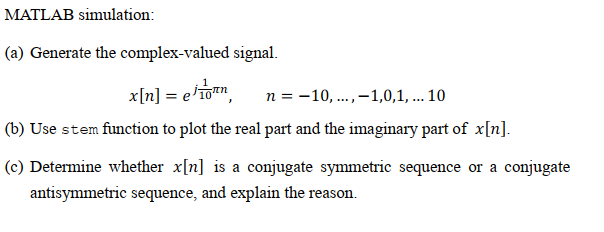

In [ ]:
# Program 2
# Plot cos signal
n5 = np.arange(0, 11)
y5 = 6 * np.cos((np.pi / 2) * n5)
plt.figure()
plt.plot(n5, y5)
plt.grid(True)
plt.title("6*cos((pi/2)*n)")
plt.show()

# Plot linear modulated signal
n6 = np.arange(0, 101)
y6 = n6 * np.cos((np.pi / 12) * n6)
plt.figure()
plt.plot(n6, y6)
plt.grid(True)
plt.title("n*cos((pi/12)*n)")
plt.show()

# Complex exponential
n7 = np.arange(0, 21)
y7 = np.exp(1j * (3 / 4) * np.pi * n7)
plt.figure()
plt.plot(n7, np.real(y7), label="Real Part")
plt.plot(n7, np.imag(y7), label="Imaginary Part")
plt.legend()
plt.grid(True)
plt.title("Complex Exponential Signal")
plt.show()

# plt.figure()
# plt.plot(np.real(y7), np.imag(y7))
# plt.grid(True)
# plt.title("Complex Plane")
# plt.show()

# plt.figure()
# plt.plot(n7, np.abs(y7))
# plt.grid(True)
# plt.title("Magnitude of Complex Signal")
# plt.show()


In [ ]:
# Problem 3
n4 = np.arange(-10, 20)
s = np.exp(1j * (1 / 10) * np.pi * n4)
Res = np.real(s)
Ims = np.imag(s)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(n4, Res, Ims, label="Complex Signal")
ax.plot(n4, Res, np.zeros_like(Res)-1, label="Real Part")
ax.plot(n4, np.zeros_like(Ims)+1, Ims, label="Imaginary Part")
ax.set_xlabel("Time")
ax.set_ylabel("Real")
ax.set_zlabel("Imaginary")
ax.legend()
plt.grid(True)
plt.show()

# Separate Real and Imaginary Parts
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n4, Res, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.title("Real Part of x[n]")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n4, Ims, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.title("Imaginary Part of x[n]")
plt.grid(True)
plt.show()


In [ ]:
def upsample_with_negative_indices(signal, indices, factor):
    """
    Upsamples the input signal by the given factor, considering negative indices.

    Parameters:
    signal (array-like): The input signal to be upsampled.
    indices (array-like): The corresponding indices of the input signal (can be negative).
    factor (int): The upsampling factor (must be a positive integer).

    Returns:
    tuple: (upsampled_signal, upsampled_indices)
           - upsampled_signal: The upsampled signal.
           - upsampled_indices: The corresponding indices of the upsampled signal.
    """
    if factor <= 0 or not isinstance(factor, int):
        raise ValueError("Factor must be a positive integer.")

    # Calculate the range of new indices
    min_index = indices[0] * factor
    max_index = indices[-1] * factor
    upsampled_indices = np.arange(min_index, max_index + 1, 1)

    # Initialize the upsampled signal with zeros
    upsampled_signal = np.zeros_like(upsampled_indices, dtype=signal.dtype)

    # Map original signal values to their new positions
    original_positions = (indices * factor - upsampled_indices[0]).astype(int)
    upsampled_signal[original_positions] = signal

    return upsampled_signal, upsampled_indices

In [ ]:
original_signal = np.array([3, 5, 2, 8])
original_indices = np.array([-2, -1, 0, 1])
upsample_factor = 3  # Upsample by a factor of 3

# Upsample the signal
upsampled_signal, upsampled_indices = upsample_with_negative_indices(original_signal, original_indices, upsample_factor)

print("Original Signal:", original_signal)
print("Original Indices:", original_indices)
print("Upsampled Signal:", upsampled_signal)
print("Upsampled Indices:", upsampled_indices)